# Evaluating 'Bestness' By Count of Smart Trash Cans

<span style="font-size: 14pt;">Smart trash containers as depolyed by the City of Pittsburgh increase efficiency of garbage collection, thus effectively improving the environmental condition of neighborhoods in Pittsburgh. The code below creates a bar chart that displays the neighborhoods in Pittsburgh and the number of smart trash containers in the neighborhood. *Note: neighborhoods not included in the data set are not included*

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

stc = pd.read_csv("smart-trash-cans.csv")
counts = stc['neighborhood'].value_counts()

plt.rcParams.update({'font.size': 100})

pd.Series(counts).plot(kind='barh', rot=0.5, edgecolor='black', figsize=(100, 300))

plt.xlabel('Smart Trash Containers')  
plt.ylabel('Neighborhood')
plt.title('Smart Trash Containers Per Pittsburgh Neighborhood')  

for i, count in enumerate(counts):
    plt.text(count, i, str(count), ha='left', va='center')

# Normalizing Smart Trash Container Counts

<span style="font-size: 14pt;">To easily evaluate the neighborhoods respective to each other, the count of smart trash containers are normalized on a scale of 1 to 10. The code below shows the normalization.

In [10]:
scores = 1 + (((counts - counts.min()) * (10 - 1)) / (counts.max() - counts.min()))
pd.DataFrame({'neighborhood': scores.index, 'score': scores},  index=counts.index)

,neighborhood,score
Shadyside,Shadyside,10.00
East Liberty,East Liberty,9.04
Squirrel Hill South,Squirrel Hill South,8.44
Bloomfield,Bloomfield,7.84
North Shore,North Shore,7.24
...,...,...
Mt. Oliver,Mt. Oliver,1.00
East Carnegie,East Carnegie,1.00
Windgap,Windgap,1.00
South Shore,South Shore,1.00


Text(0.5, 1.0, 'Geographical Heatmap of Scores')

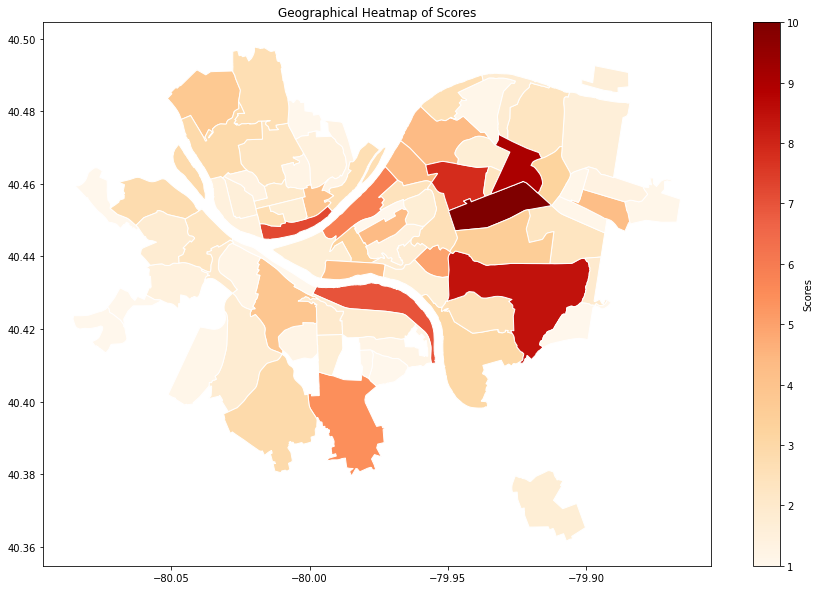

In [9]:
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

score_map = neighborhoods.merge(pd.DataFrame({'neighborhood': scores.index, 'score': scores}), how='left', left_on='hood', right_on='neighborhood')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
score_map.plot(column='score', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Scores"}, ax=ax)
ax.set_title('Geographical Heatmap of Scores')  

Shad